# TP – Smart city Index

In [81]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns

## 1- Data preprocessing

récupération du csv

In [82]:
df = pd.read_csv('Smart_City_index_headers.csv', index_col= [0])
df.head()

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
Id,,,,,,,,,,
1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


On garde que les colonnes qu'on peut traiter 

In [83]:
num_data = df.select_dtypes(include=['int64', 'float64'])
print(num_data)

     Smart_Mobility   Smart_Environment  Smart_Government   Smart_Economy   \
Id                                                                           
1               6480               6512               7516            4565   
2               7097               6876               7350            4905   
3               7540               5558               8528            8095   
4               7490               7920               8726            5580   
5               6122               7692               8354            4330   
..               ...                ...                ...             ...   
98              4152               4584               4616            7380   
99              7610               2998               2806            4905   
100             4588               2908               3622            4515   
101             6675               4052               5946            8022   
102             5801               4499               6396      

Aperçu des données :

In [84]:
num_data.describe()

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765,-480.392157
std,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180,852.783238
min,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000,-2281.000000
25%,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000,-1105.750000
50%,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000,-210.500000
75%,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000,200.500000
max,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000,880.000000


In [85]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 102
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Smart_Mobility                     102 non-null    int64
 1   Smart_Environment                  102 non-null    int64
 2   Smart_Government                   102 non-null    int64
 3   Smart_Economy                      102 non-null    int64
 4   Smart_People                       102 non-null    int64
 5   Smart_Living                       102 non-null    int64
 6   SmartCity_Index                    102 non-null    int64
 7   SmartCity_Index_relative_Edmonton  102 non-null    int64
dtypes: int64(8)
memory usage: 7.2 KB


On vérifie s'il y a des valeurs manquante ou des doublons

In [86]:
print("Valeurs manquantes par colonne :\n", num_data.isnull().sum())
print("Doublons dans les données :", num_data.duplicated().sum())

Valeurs manquantes par colonne :
 Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64
Doublons dans les données : 0


Visualisation des distributions des variables

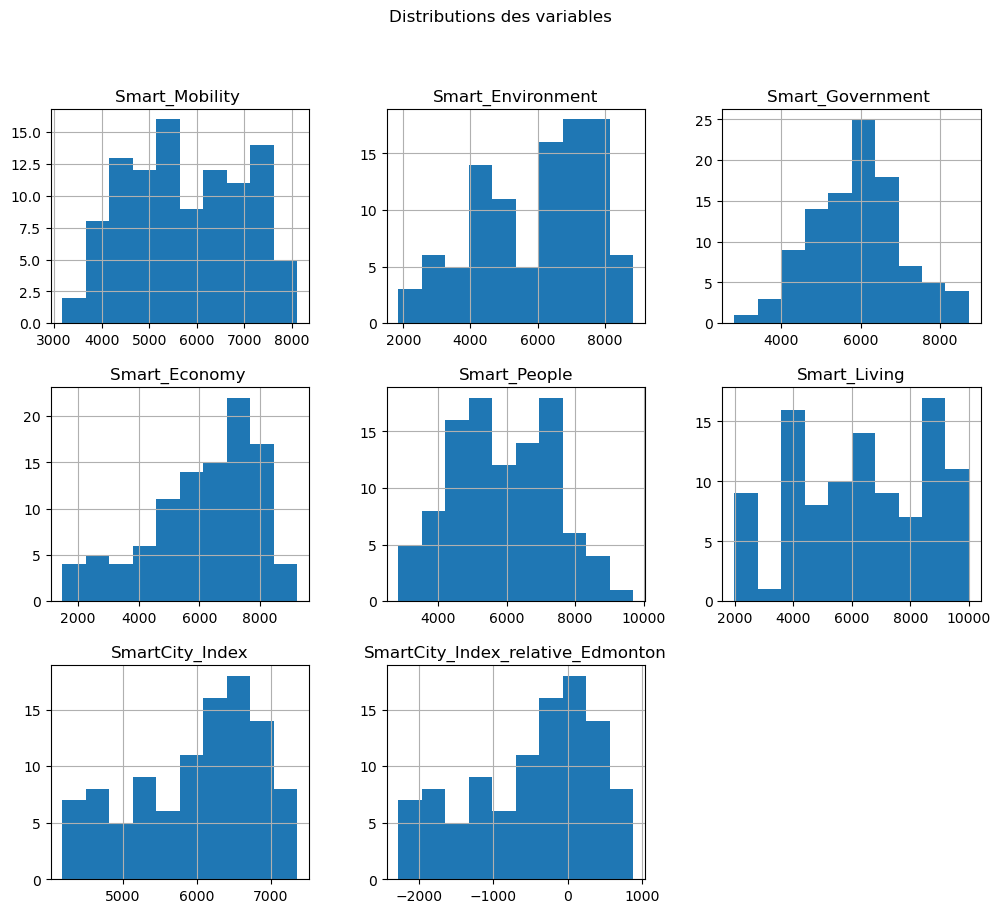

In [87]:
num_data.hist(figsize=(12, 10))
plt.suptitle("Distributions des variables")
plt.show()

## 2- Linear Regression Model:

Coefficient de corrélation

In [88]:
num_data.corr()

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
Smart_Mobility,1.000000,-0.220157,-0.048124,-0.262269,0.347033,0.114040,0.321177,0.321139
Smart_Environment,-0.220157,1.000000,0.286157,0.454461,-0.030408,0.154816,0.513441,0.513460
Smart_Government,-0.048124,0.286157,1.000000,0.160215,0.222085,0.441970,0.578709,0.578635
Smart_Economy,-0.262269,0.454461,0.160215,1.000000,-0.122517,0.046221,0.379262,0.379316
Smart_People,0.347033,-0.030408,0.222085,-0.122517,1.000000,0.321051,0.504805,0.504862
Smart_Living,0.114040,0.154816,0.441970,0.046221,0.321051,1.000000,0.765068,0.765050
SmartCity_Index,0.321177,0.513441,0.578709,0.379262,0.504805,0.765068,1.000000,1.000000
SmartCity_Index_relative_Edmonton,0.321139,0.513460,0.578635,0.379316,0.504862,0.765050,1.000000,1.000000


On étudie la dépendance entre les variables Smart_Environment et Smart_Government

In [89]:
corr, p_value = pearsonr(df['Smart_Environment'], df['Smart_Government '])
print(f"Coefficient de corrélation: {corr}")
print(f"Valeur p: {p_value}")

alpha = 0.02
if p_value < alpha:
    print("Il existe une dépendance significative entre Smart_Environment et Smart_Government.")
else:
    print("Il n'existe pas de dépendance significative entre Smart_Environment et Smart_Government.")

Coefficient de corrélation: 0.28615726724438534
Valeur p: 0.003549388931709136
Il existe une dépendance significative entre Smart_Environment et Smart_Government.


On a donc une dépendance entre ces deux colonnes et le coefficient de corrélation entre les deux variables est de 0.0035 qui est donc inférieur à 2%

On étudie la dépendance entre les variables Smart-Mobility et Smart-People

In [90]:
corr, p_value = pearsonr(df['Smart_Mobility '], df['Smart_People'])
print(f"Coefficient de corrélation: {corr}")
print(f"Valeur p: {p_value}")

alpha = 0.02
if p_value < alpha:
    print("Il existe une dépendance significative entre Smart-Mobility et Smart-People.")
else:
    print("Il n'existe pas de dépendance significative entre Smart-Mobility et Smart-People.")

Coefficient de corrélation: 0.34703271186330975
Valeur p: 0.00035239395049966953
Il existe une dépendance significative entre Smart-Mobility et Smart-People.


On a donc une dépendance entre ces deux colonnes et le coefficient de corrélation entre les deux variables est de 0.0035 qui est donc inférieur à 2%

Visualisation de la matrice de corrélation entre tout les facteurs

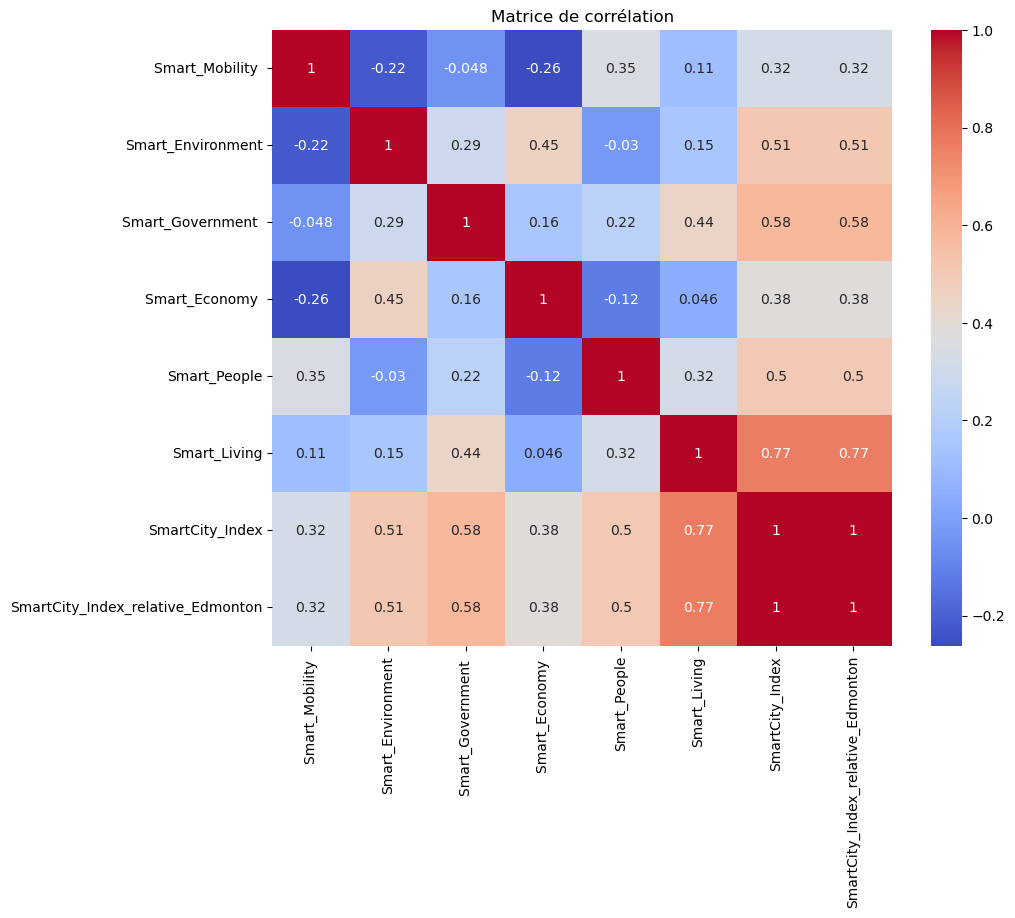

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Identifier quelle variable devra être utilisée pour une prédiction :
C'est le colonne Smart_Living car c'est elle qui a le plus Coefficient  de corrélation

In [92]:
corr, p_value = pearsonr(df['Smart_Living'], df['SmartCity_Index'])
print(f"Coefficient de corrélation: {corr}")
print(f"Valeur p: {p_value}")

alpha = 0.02
if p_value < alpha:
    print("Il existe une dépendance significative entre Smart_Living et SmartCity_Index.")
else:
    print("Il n'existe pas de dépendance significative entre Smart_Living et SmartCity_Index.")

Coefficient de corrélation: 0.7650679961867751
Valeur p: 7.931743285224989e-21
Il existe une dépendance significative entre Smart_Living et SmartCity_Index.


Ainsi donc il y a une forte dépendance entre ces deux variables et leur p_value est presque a 0 (7.931e-21)

#### scatter diagram

Text(0, 0.5, 'SmartCity_Index')

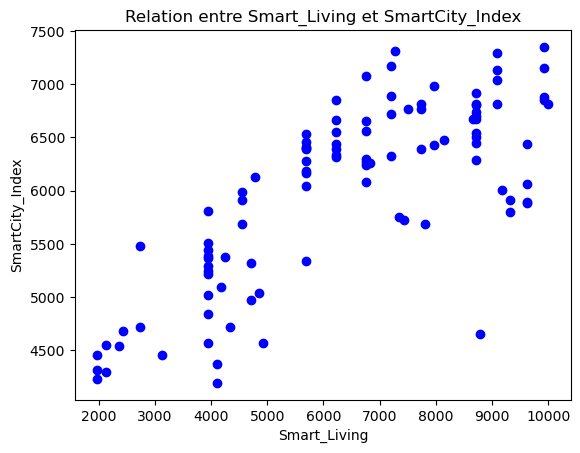

In [93]:
plt.scatter(df['Smart_Living'], df['SmartCity_Index'], color="blue", label="Données réelles")
plt.title("Relation entre Smart_Living et SmartCity_Index")
plt.xlabel("Smart_Living")
plt.ylabel("SmartCity_Index")

#### linear regression line

In [94]:
slope, intercept, r_value, p_value, std_err = linregress(df['Smart_Living'], df['SmartCity_Index'])

def Prediction (X):
    return slope * X + intercept

In [95]:
fitline = Prediction(df['Smart_Living'])
print("equation de la droite de régression linéaire : ",slope, "* X + ", intercept)

equation de la droite de régression linéaire :  0.28535327052882986 * X +  4172.202768219199


Text(0, 0.5, 'SmartCity_Index')

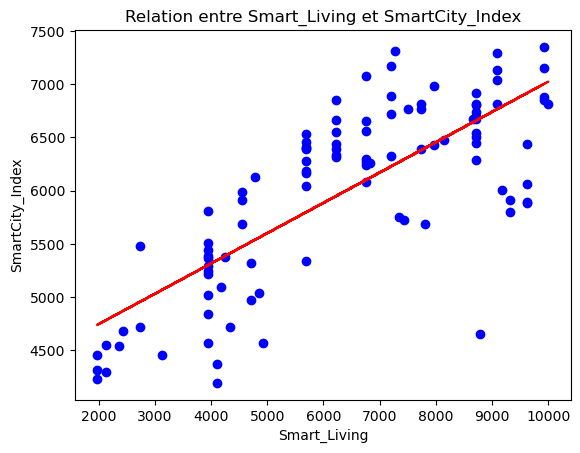

In [96]:
plt.plot(df['Smart_Living'], fitline, color="red", label="Modèle de régression")
plt.scatter(df['Smart_Living'], df['SmartCity_Index'], color="blue", label="Données réelles")
plt.title("Relation entre Smart_Living et SmartCity_Index")
plt.xlabel("Smart_Living")
plt.ylabel("SmartCity_Index")

Création d'un nouveau DataFrame incluant X, Y et Y prédit

In [97]:
data_frame = pd.DataFrame({
    "Smart_Living": df["Smart_Living"],
    "SmartCity_Index": df["SmartCity_Index"]
})

data_frame['Prédit'] = fitline
data_frame['Écart'] = data_frame['SmartCity_Index'] - data_frame['Prédit']
data_frame = data_frame.sort_values(by='Écart', ascending=True)
data_frame.head()

,Smart_Living,SmartCity_Index,Prédit,Écart
Id,,,,
94,8790,4652,6680.458016,-2028.458016
100,4100,4191,5342.151177,-1151.151177
59,9320,5795,6831.695250,-1036.695250
56,9620,5885,6917.301231,-1032.301231
52,9620,5892,6917.301231,-1025.301231


In [98]:
print(data_frame['Écart'].sum())

6.912159733474255e-11


In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(data_frame['SmartCity_Index'], data_frame['Prédit'])
mse = mean_squared_error(data_frame['SmartCity_Index'], data_frame['Prédit'])
rmse = np.sqrt(mse)
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MAE : 433.44472773548654
MSE : 298602.8362745871
RMSE : 546.4456389016085


Génération des prédictions pour de nouvelles données

In [106]:
new_data = np.array([10120, 11090 ,12338 , 14764, 14299, 15666, 16523, 17589, 18110, 19000])
print(new_data)
new_predictions = Prediction(new_data)
print("\nPrédictions pour de nouvelles valeurs de Smart Living :")
for i, pred in enumerate(new_predictions):
    print(f"Smart Living {new_data[i]} -> Prédiction : {pred}")


[10120 11090 12338 14764 14299 15666 16523 17589 18110 19000]

Prédictions pour de nouvelles valeurs de Smart Living :
Smart Living 10120 -> Prédiction : 7059.977865970957
Smart Living 11090 -> Prédiction : 7336.770538383922
Smart Living 12338 -> Prédiction : 7692.891420003902
Smart Living 14764 -> Prédiction : 8385.158454306842
Smart Living 14299 -> Prédiction : 8252.469183510937
Smart Living 15666 -> Prédiction : 8642.547104323847
Smart Living 16523 -> Prédiction : 8887.094857167056
Smart Living 17589 -> Prédiction : 9191.281443550788
Smart Living 18110 -> Prédiction : 9339.95049749631
Smart Living 19000 -> Prédiction : 9593.914908266966
